In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import sklearn
import seaborn as sns


In [54]:
train = pd.read_csv('problem_2_train.csv')
test = pd.read_csv('problem_2_test.csv')

In [55]:
train.head()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,AN,7,500004,233,233,131,A,ADLD,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5
1,2838330,AJ,10,226010,233,233,131,A,ADLD,226022,2017-03-06,2017-03-05,2018-02-04,4444,2018-02-08,12
2,2835781,AJ,2,110018,233,233,228,A,ADLD,110018,2018-02-01,2018-01-27,2018-02-03,4388,2018-02-12,9
3,2838589,AM,2,110018,233,233,228,B,ADLD,124001,2018-01-17,2018-01-31,2018-02-04,4092,2018-02-14,9
4,2855214,AN,21,110015,233,233,131,A,ADLD,201301,2018-01-23,2018-01-20,2018-02-09,4580,2018-02-14,8


In [56]:
test.head()

,Unnamed: 0,Unnamed: 0.1,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,pickupStartdate_Code,claimintdate_Code,tat_in_days
0,2,2,10,3,560011,233,233,228,2,0,590014,2018-12-01,2018-11-01,2018-02-21,4460,2018-02-28,1519776000000000000,1519171200000000000,13
1,3,3,10,2,110018,233,233,228,1,0,250110,2017-07-08,2017-05-21,2018-02-16,4388,2018-02-26,1519603200000000000,1518739200000000000,13
2,4,4,13,22,400104,233,233,131,2,0,496001,2017-10-11,2017-09-22,2018-02-20,4581,2018-02-23,1519344000000000000,1519084800000000000,13
3,5,5,15,6,160059,233,233,131,1,0,160036,2017-12-12,2017-10-12,2018-02-22,4549,2018-02-27,1519689600000000000,1519257600000000000,12
4,8,8,13,21,110015,233,233,131,1,0,124001,2017-12-31,2017-06-26,2018-05-03,4580,2018-03-14,1520985600000000000,1525305600000000000,6


In [57]:
from sklearn.preprocessing import LabelEncoder
le_mobmake = LabelEncoder()
le_custpincodecat = LabelEncoder()
le_claimtype = LabelEncoder()

In [58]:
train['mobmake'] = le_mobmake.fit_transform(train['mobmake'])
train['custpincodecategory'] = le_custpincodecat.fit_transform(train['custpincodecategory'])
train['claimtype'] = le_claimtype.fit_transform(train['claimtype'])


test['mobmake'] = le_mobmake.fit_transform(test['mobmake'])
test['custpincodecategory'] = le_custpincodecat.fit_transform(test['custpincodecategory'])
test['claimtype'] = le_claimtype.fit_transform(test['claimtype'])

In [59]:
train.head(1)

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days
0,2851218,12,7,500004,233,233,131,1,0,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5


In [60]:
train.custpincodecategory.value_counts()

1    4020
2    1346
3     554
0     186
4     144
Name: custpincodecategory, dtype: int64

In [61]:
test.custpincodecategory.value_counts()

0    475
1    204
2     44
Name: custpincodecategory, dtype: int64

In [62]:
null_pincat_train = train.query("custpincodecategory == '0'").index
null_pincat_test = test.query("custpincodecategory == '0'").index

In [63]:
train.drop(null_pincat_train,inplace = True)

In [64]:
test.drop(null_pincat_test, inplace = True)

In [89]:
train.custpincodecategory.value_counts()

1    4020
2    1346
3     554
4     144
Name: custpincodecategory, dtype: int64

In [66]:
train['memcreateddate'] = pd.to_datetime(train['memcreateddate'])
train['mobilepurchasedate'] = pd.to_datetime(train['mobilepurchasedate'])
train['claimintdate'] = pd.to_datetime(train['claimintdate'])
train['pickupStartdate'] = pd.to_datetime(train['pickupStartdate'])

In [90]:
train.dtypes

srno                             int64
mobmake                          int32
hubid                            int64
hubpincode                       int64
pickuppartnerid                  int64
deliverypartnerid                int64
insuranceCompanyId               int64
custpincodecategory              int32
claimtype                        int32
custpincode                      int64
memcreateddate          datetime64[ns]
mobilepurchasedate      datetime64[ns]
claimintdate            datetime64[ns]
servicecntrid                    int64
pickupStartdate         datetime64[ns]
tat_in_days                      int64
pickupStartdate_Code             int64
claimintdate_Code                int64
dtype: object

In [68]:
test['memcreateddate'] = pd.to_datetime(test['memcreateddate'])
test['mobilepurchasedate'] = pd.to_datetime(test['mobilepurchasedate'])
test['claimintdate'] = pd.to_datetime(test['claimintdate'])
test['pickupStartdate'] = pd.to_datetime(test['pickupStartdate'])

In [69]:
test.dtypes

Unnamed: 0                       int64
Unnamed: 0.1                     int64
mobmake                          int32
hubid                            int64
hubpincode                       int64
pickuppartnerid                  int64
deliverypartnerid                int64
insuranceCompanyId               int64
custpincodecategory              int32
claimtype                        int32
custpincode                      int64
memcreateddate          datetime64[ns]
mobilepurchasedate      datetime64[ns]
claimintdate            datetime64[ns]
servicecntrid                    int64
pickupStartdate         datetime64[ns]
pickupStartdate_Code             int64
claimintdate_Code                int64
tat_in_days                      int64
dtype: object

In [70]:
train['pickupStartdate_Code']=pd.to_numeric(train['pickupStartdate'])
train['claimintdate_Code'] = pd.to_numeric(train['claimintdate'])

In [71]:
test['pickupStartdate_Code']=pd.to_numeric(test['pickupStartdate'])
test['claimintdate_Code'] = pd.to_numeric(test['claimintdate'])

In [20]:
train.corr()

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,servicecntrid,tat_in_days,pickupStartdate_Code,claimintdate_Code
srno,1.000000,-0.018743,0.278181,-0.023651,0.085064,0.013483,0.042196,-0.060024,-0.002612,-0.011799,0.123686,-0.191784,0.969781,0.998955
mobmake,-0.018743,1.000000,-0.159066,-0.065548,0.005897,-0.001430,-0.068416,0.000617,0.030627,-0.031002,-0.039032,0.159508,-0.013650,-0.019163
hubid,0.278181,-0.159066,1.000000,-0.053873,0.043863,-0.000923,-0.150516,0.081381,-0.003217,-0.023560,0.453385,-0.130054,0.274771,0.276349
hubpincode,-0.023651,-0.065548,-0.053873,1.000000,-0.037902,-0.023168,-0.088599,0.071128,0.010370,0.935550,0.202960,-0.001734,-0.030439,-0.023359
pickuppartnerid,0.085064,0.005897,0.043863,-0.037902,1.000000,0.183860,0.093446,-0.168174,-0.034984,-0.050276,0.045379,-0.051229,0.086464,0.084857
deliverypartnerid,0.013483,-0.001430,-0.000923,-0.023168,0.183860,1.000000,0.025887,-0.035476,-0.068541,-0.023051,0.024550,-0.055695,0.017665,0.013722
insuranceCompanyId,0.042196,-0.068416,-0.150516,-0.088599,0.093446,0.025887,1.000000,-0.089211,0.044676,-0.098107,-0.135815,-0.032245,0.027457,0.041351
custpincodecategory,-0.060024,0.000617,0.081381,0.071128,-0.168174,-0.035476,-0.089211,1.000000,-0.007657,0.129381,0.064950,0.238880,-0.054386,-0.060836
claimtype,-0.002612,0.030627,-0.003217,0.010370,-0.034984,-0.068541,0.044676,-0.007657,1.000000,0.009260,-0.004266,0.082692,-0.003497,-0.003065
custpincode,-0.011799,-0.031002,-0.023560,0.935550,-0.050276,-0.023051,-0.098107,0.129381,0.009260,1.000000,0.212148,0.042921,-0.019456,-0.011939


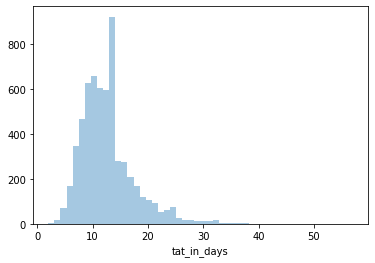

In [72]:
sns.distplot(train['tat_in_days'], kde = False)

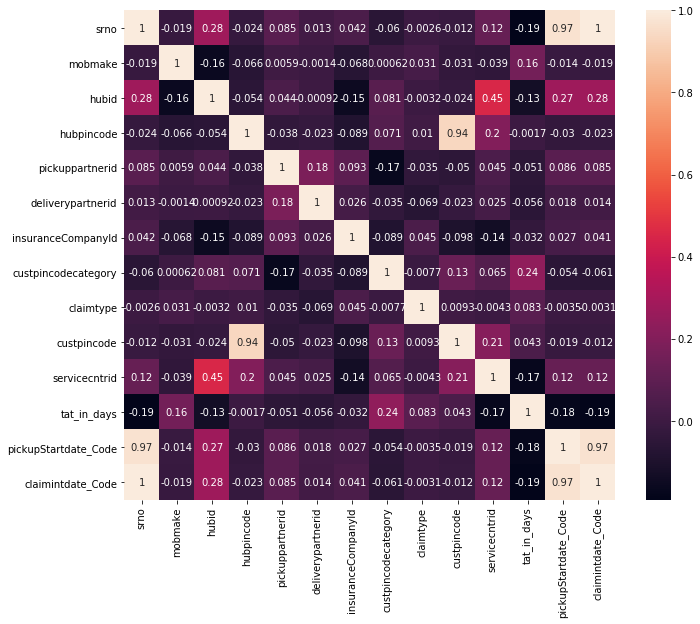

In [245]:
plt.figure(figsize=(11,9))
sns.heatmap(train.corr(), annot = True)


In [73]:
train.tat_in_days.value_counts()

10    658
9     627
11    605
12    594
13    476
8     468
14    446
7     348
15    280
16    276
17    209
18    168
6     168
19    118
20    108
21     94
5      71
23     60
22     53
24     39
25     38
26     26
4      18
27     18
28     17
32     16
29     15
30     11
31     11
33      6
34      4
38      4
37      2
3       2
36      1
39      1
40      1
44      1
41      1
35      1
57      1
2       1
46      1
45      1
Name: tat_in_days, dtype: int64

In [74]:
train.head(1)

,srno,mobmake,hubid,hubpincode,pickuppartnerid,deliverypartnerid,insuranceCompanyId,custpincodecategory,claimtype,custpincode,memcreateddate,mobilepurchasedate,claimintdate,servicecntrid,pickupStartdate,tat_in_days,pickupStartdate_Code,claimintdate_Code
0,2851218,12,7,500004,233,233,131,1,0,500001,2017-04-27,2016-12-02,2018-02-08,4403,2018-02-13,5,1518480000000000000,1518048000000000000


In [75]:
from sklearn.model_selection import train_test_split

In [190]:
X = train[['mobmake','hubpincode','pickuppartnerid','deliverypartnerid','insuranceCompanyId','custpincode','claimtype','servicecntrid','pickupStartdate_Code']]
y = train['tat_in_days']

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.20,random_state=1)

In [229]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(4548, 9)
(1516, 9)
(4548,)
(1516,)


#### Linear Regression

In [259]:
from sklearn.linear_model import LinearRegression
import math

linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred = linreg.predict(X_test)
y_pred = y_pred.astype(int)


In [260]:
y_pred

array([13, 10, 13, ..., 13, 14, 11])

In [261]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

4.600530454378635

#### Ridge Regression

In [264]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
y_pred = y_pred.astype(int)


c:\users\sanch\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.49376e-34): result may not be accurate.
  overwrite_a=True).T


In [265]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

4.586801380972512

#### Lasso Regression

In [266]:
from sklearn.linear_model import Lasso

model = Lasso()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred = y_pred.astype(int)


In [267]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

4.604739663667929

## Ridge Regression produced the least Root Mean Squared Error

In [268]:
X_test = test[['mobmake','hubpincode','pickuppartnerid','deliverypartnerid','insuranceCompanyId','custpincode','claimtype','servicecntrid','pickupStartdate_Code']]

In [269]:
y_pred = ridge.predict(X_test)
y_pred = y_pred.astype(int)

In [270]:
y_pred

array([12, 13,  6, 12, 10, 13,  8, 15, 14, 13, 11, 12, 10, 10,  3,  1,  1,
       13, 12, 12, 16, 11, 12,  7, 14,  5, 12, 12,  4, 13,  5, 12,  5, 13,
        5,  6,  6,  9,  4, 11, 10, 13, 11, 13,  7, 12,  4, 11, 13, 10,  4,
       12, 11, 11, 10, 12,  5,  2, 12, 12, 12, 12, 11, 13, 13, 12, 12, 11,
       11, 13,  7, 14, 13, 11, 14, 10,  9, 12,  2, 17, 17, 11, 12, 11, 13,
       13, 15, 11, 10, 12, 12, 12, 11,  4,  3, 13,  4, 12, 12,  3,  2,  2,
       14, 17, 10, 10, 12, 14,  9, 12,  4, 12, 12, 12, 12, 12, 11, 12, 14,
       10,  4, 11, 14,  7,  3,  3, 12, 12,  6, 12, 12, 11, 12, 13, 15, 14,
       14,  1, 12,  5,  8,  8,  5, 12, 12, 12, 10, 15, 12, 13, 10,  7, 12,
       14,  2,  7, 10,  9, 13, 19,  4,  8,  8, 13, 11, 11,  9, 12,  7, 13,
       13, 12, 12, 13, 13, 12, 11, 10, 13, 12, 12, 13, 12, 10,  9,  9, 12,
       13, 14, 13, 15,  8, 12, 11, 11, 10, 13, 13,  0, 11,  1,  1, 12, 12,
        9,  3, 12, 12,  8, 10,  9,  1, 12, 12,  2,  2, 13, 11,  8, 11, 12,
       13,  5,  1, 12, 12

In [271]:
y_pred.shape

(248,)

In [272]:
test['tat_in_days'] = y_pred

In [273]:
test.to_csv('problem_2_test.csv')